In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import os
from matplotlib import font_manager as fm, rcParams
import matplotlib.image as mpimg


params = {'font.family': 'serif',}
matplotlib.rcParams.update(params)


G=6.67*10**-8  #grav in cgs
kboltz=1.38*10**-16
mu=2.5
mh=1.67*10**-24
massjup=1.89*10**30
radjup=7.140*10**9
radsun=6.96*10**10
AU=1.496*10**13.  #cm

masssat=5.683*10**29. #g
radsat=5.82*10**9. #cm
denssat=masssat/((4.*np.pi/3.)*radsat**3.)

j2n_mass=18.5346158


import pandas as pd
planets=pd.read_csv('compositepars.csv',skiprows=124,delimiter=',')

[1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006.
 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018.
 2019. 2020. 2021.]
4364


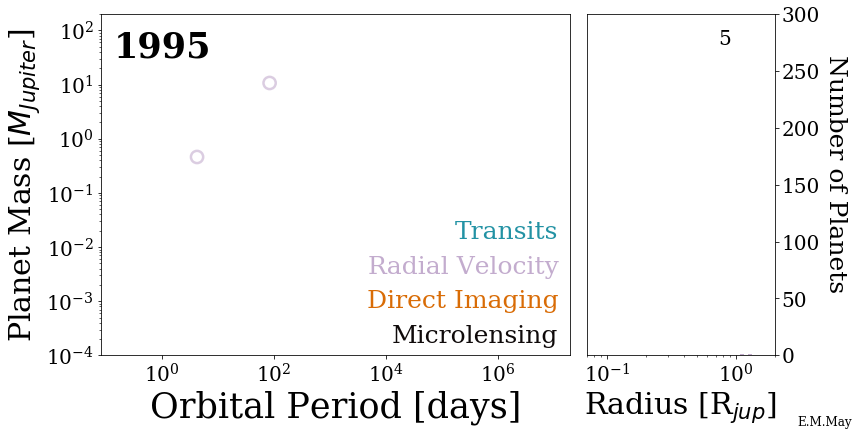

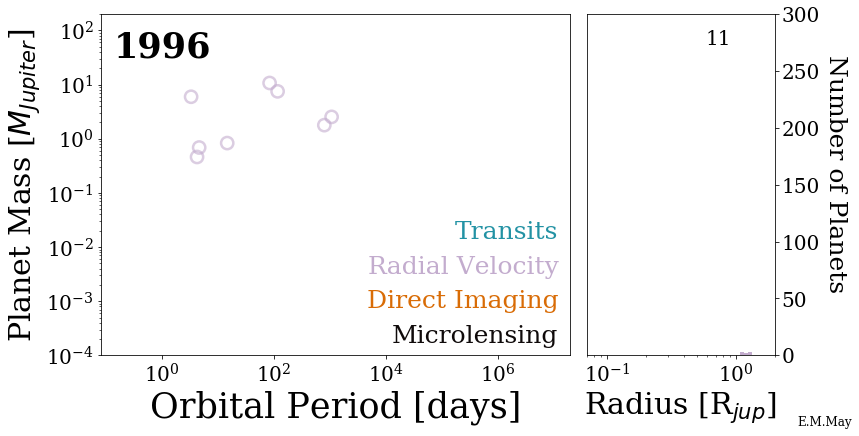

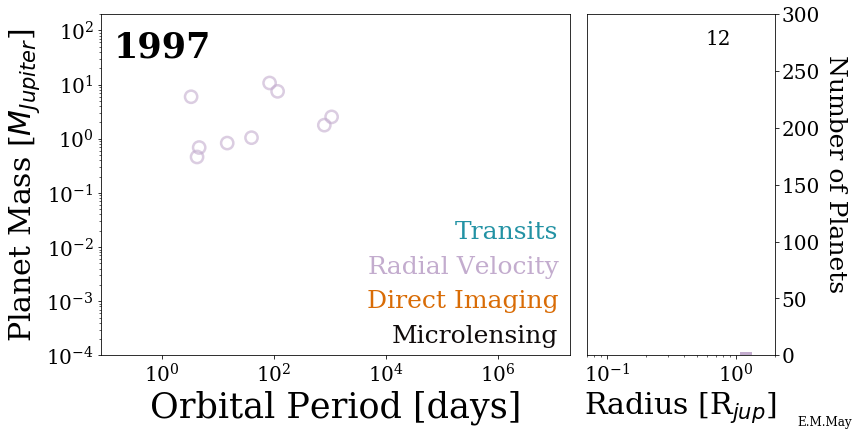

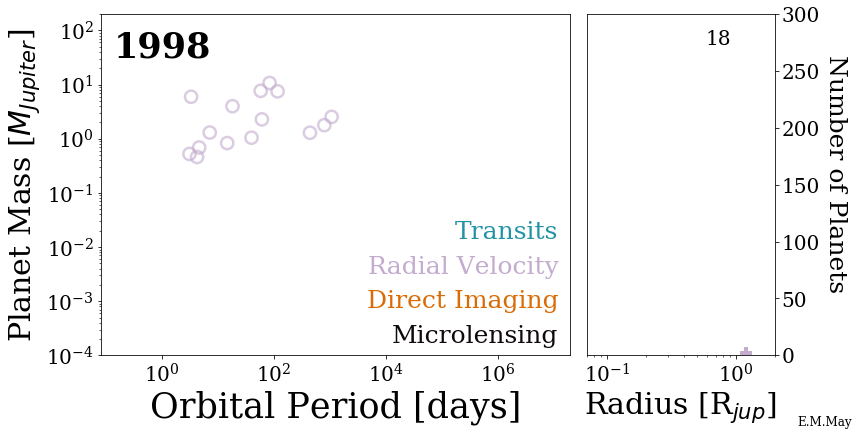

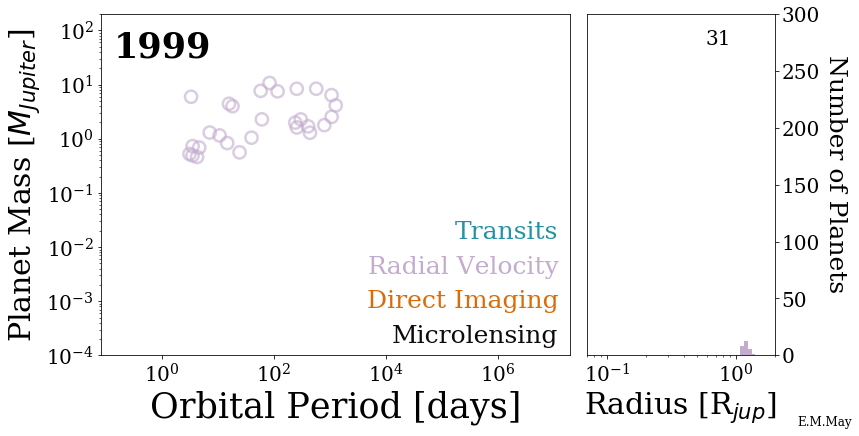

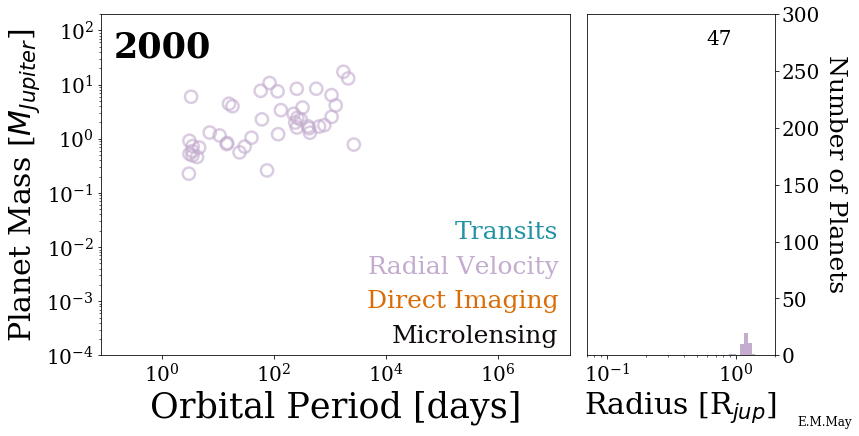

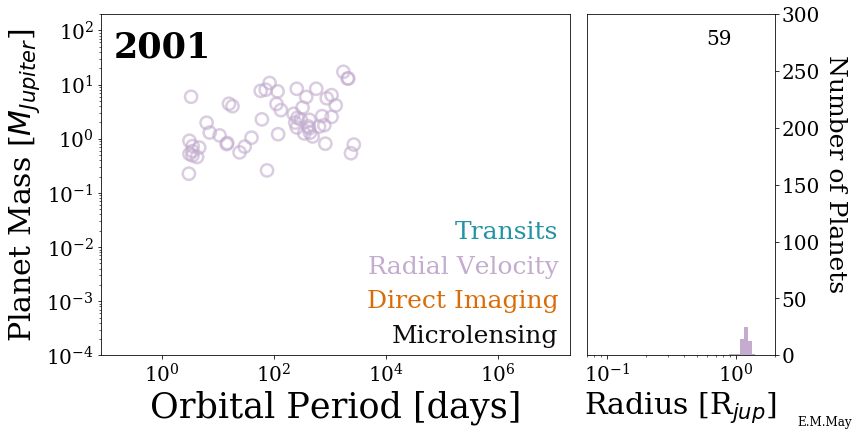

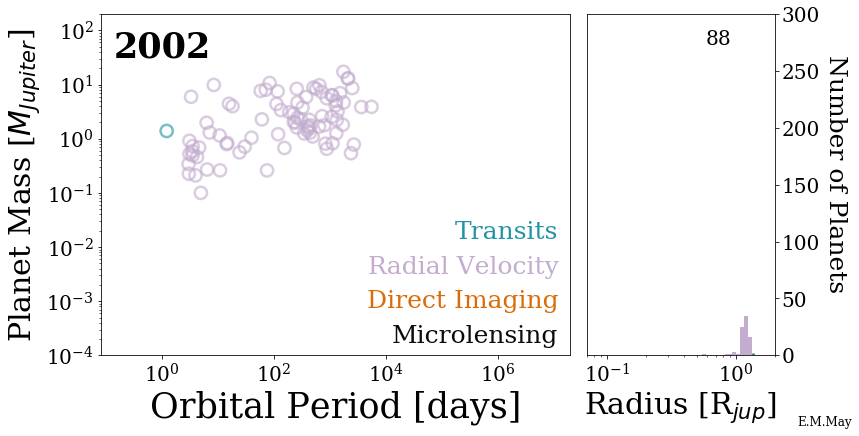

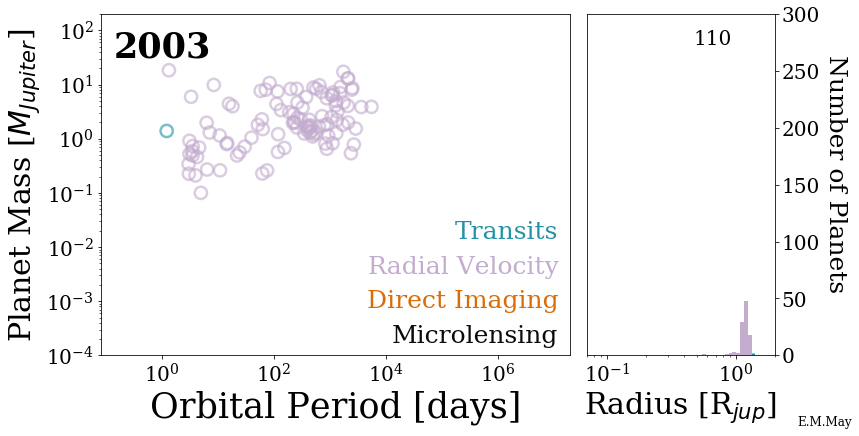

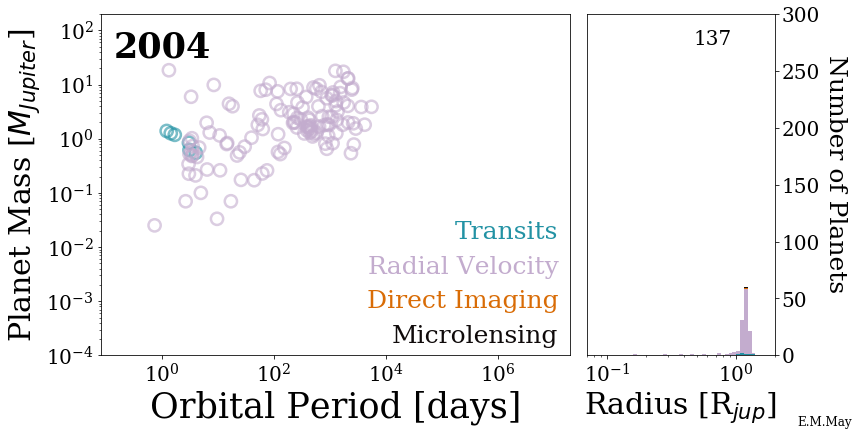

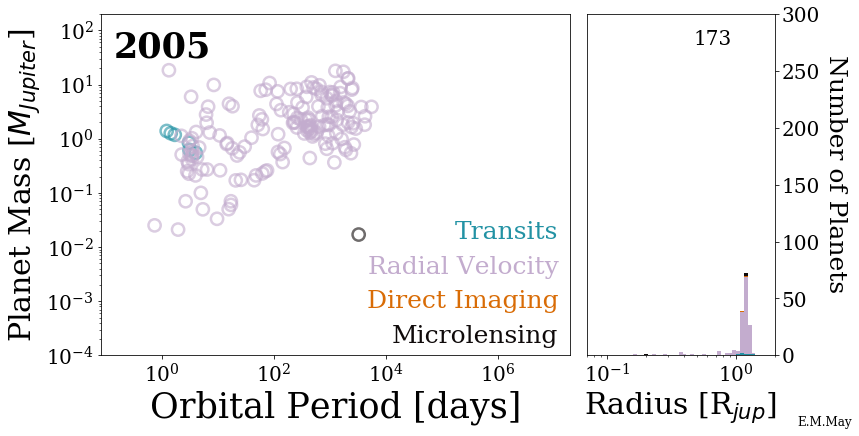

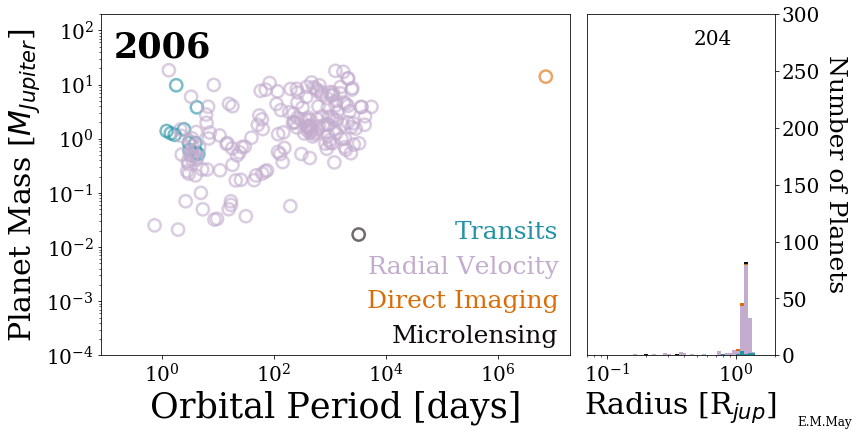

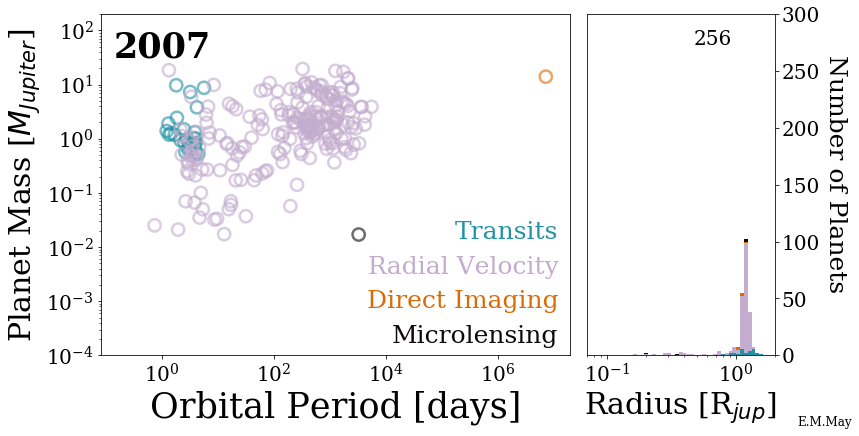

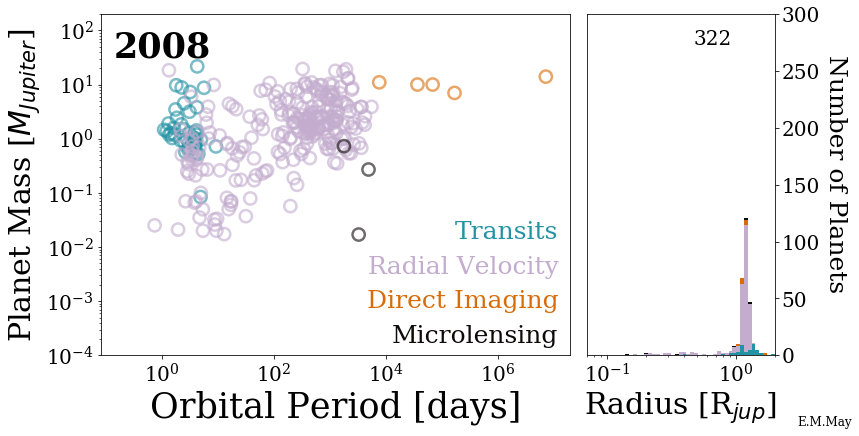

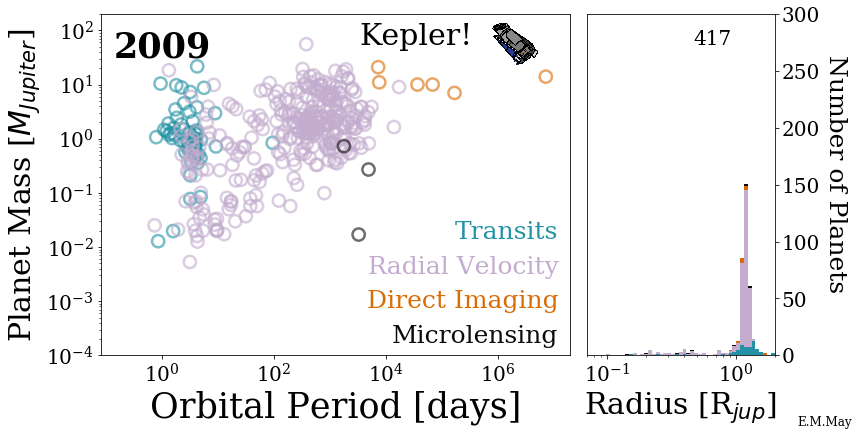

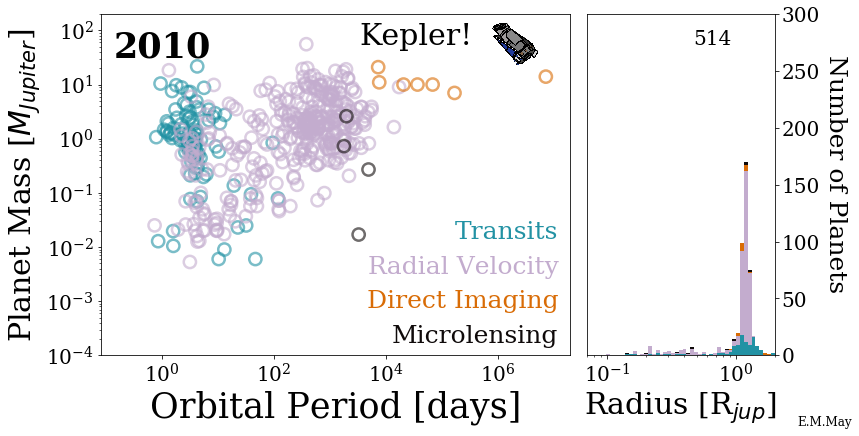

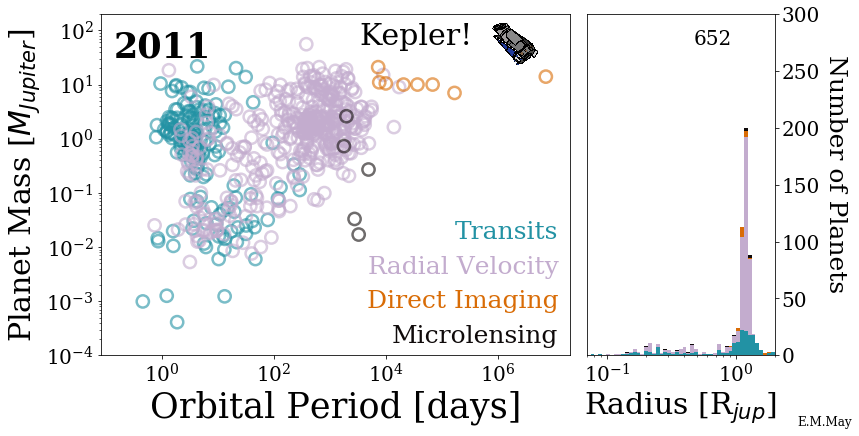

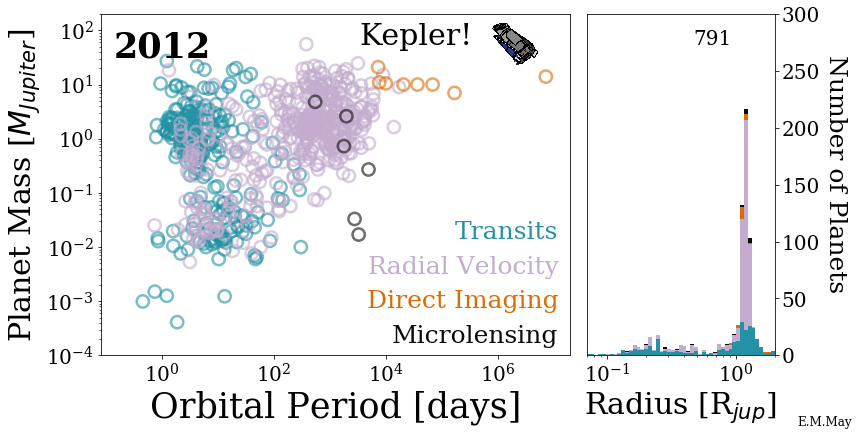

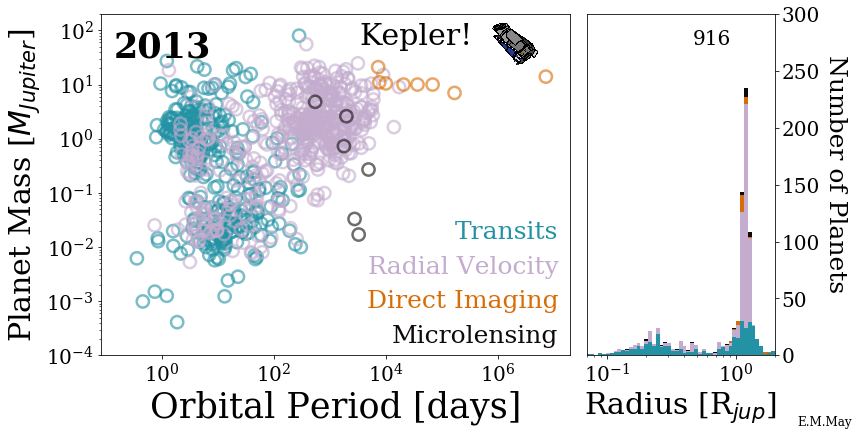

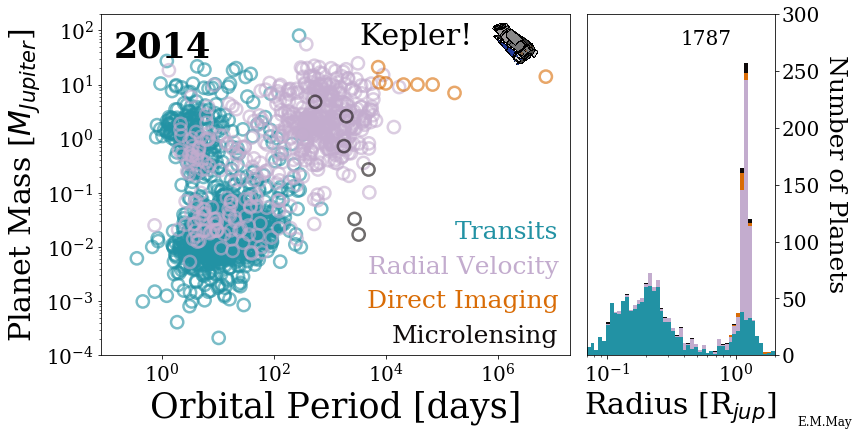

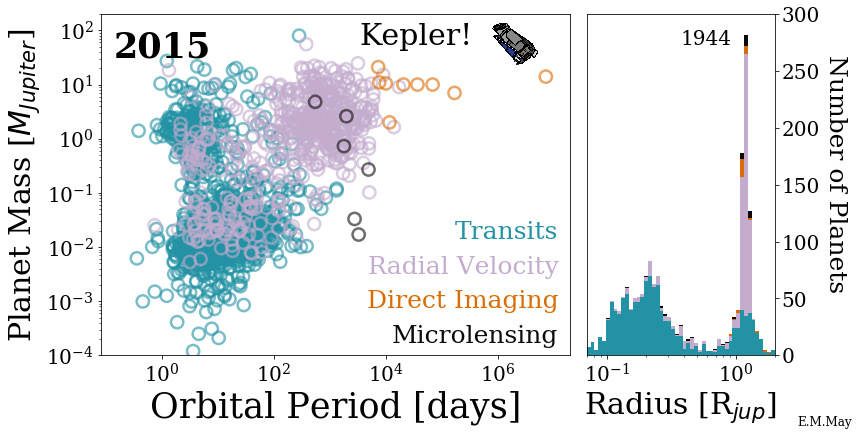

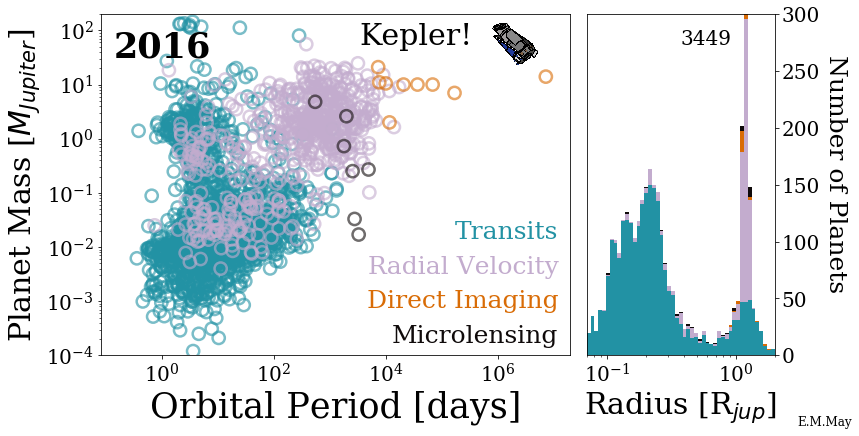

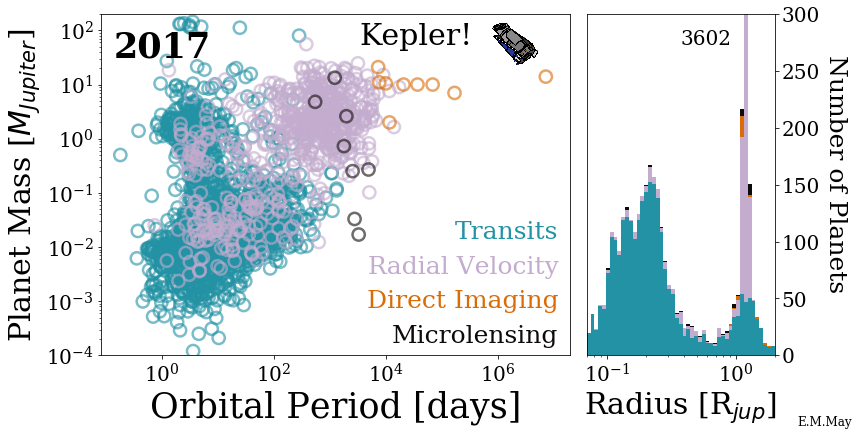

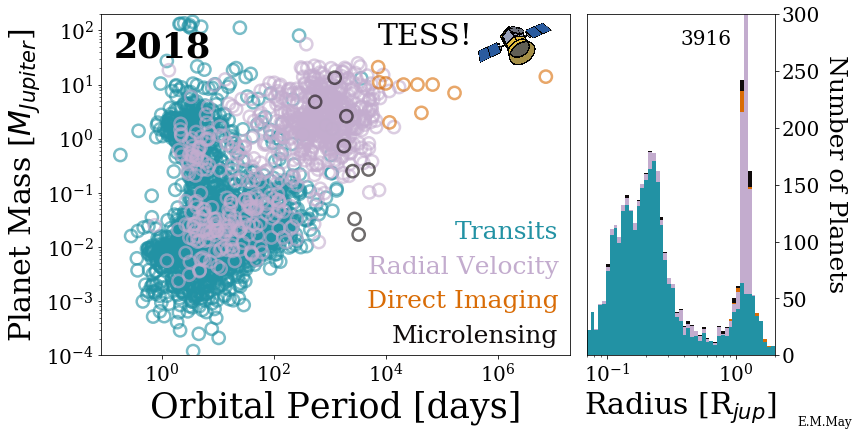

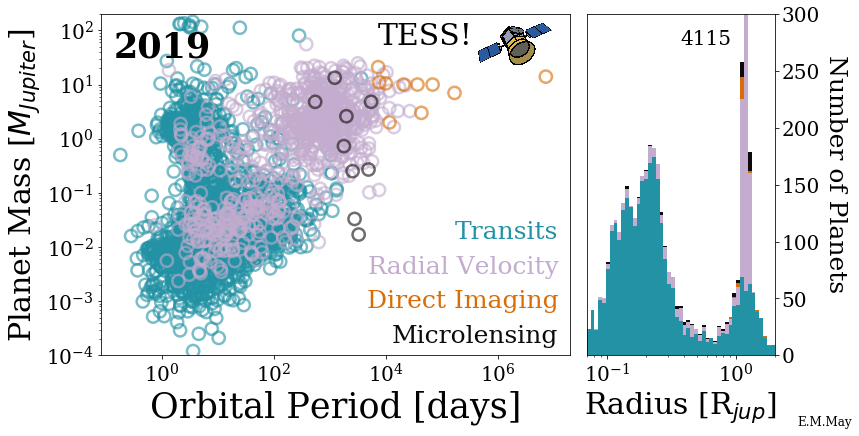

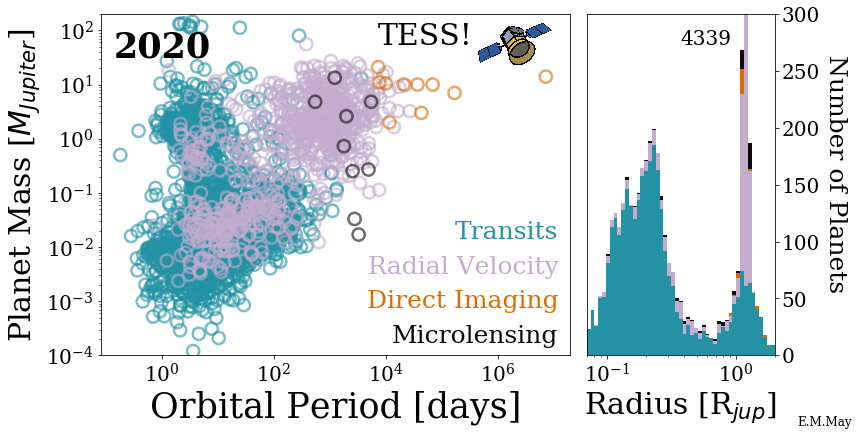

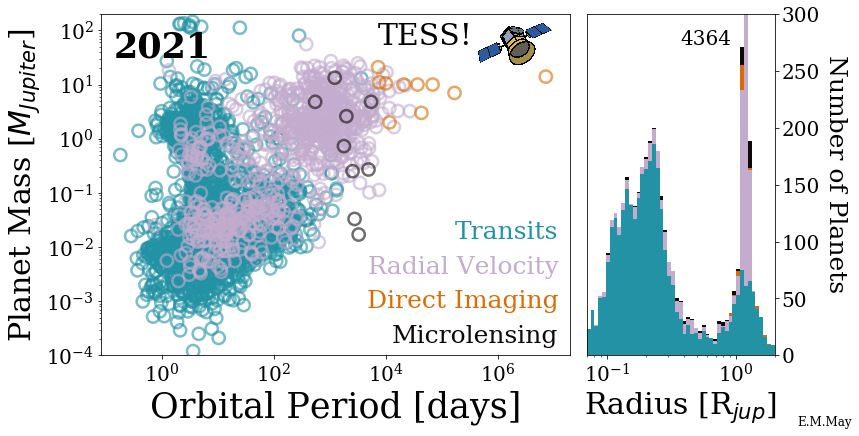

In [2]:
tc='royalblue'
savepath='DiscoveryGif/'

t_arr=np.linspace(1995,2021,(2021-1995)+1)
print(t_arr)

print(len(planets['fpl_discmethod']))
for t in t_arr:
#     if t!=2018:
#         continue
    #plt.figure(figsize=(12.,11./2.))
    fig,ax= plt.subplots(1,2, figsize = (12., 6.0), gridspec_kw={'width_ratios': [2.5, 1]})
    plt.gcf().subplots_adjust(bottom=0.18,top=0.97,left=0.12,right=0.90, wspace =  0.05)
    
    plts_i=np.where(planets['fpl_disc'].values<=t)[0]
    orb_y=(planets['fpl_orbper'].values)[plts_i]
    mas_y=(planets['fpl_bmassj'].values)[plts_i]
    dmt_y=(planets['fpl_discmethod'].values)[plts_i]
    rad_y=(planets['fpl_radj'].values)[plts_i]
    
    
    tr_i=np.where(dmt_y=='Transit')[0]
    rv_i=np.where(dmt_y=='Radial Velocity')[0]
    di_i=np.where(dmt_y=='Imaging')[0]
    ml_i=np.where(dmt_y=='Microlensing')[0]
    
    tc='#2292A4'#'royalblue'
    rc='#C3ACCE'#'#BDBF09'#'goldenrod'
    dc='#D96C06'#'darkgreen'
    mc='#0F0A0A'#'dimgrey'


#     plt.scatter(orb_y[tr_i],mas_y[tr_i],s=150,facecolor='none',edgecolor=tc,alpha=0.8)
#     plt.scatter(orb_y[rv_i],mas_y[rv_i],s=150,facecolor='none',edgecolor=rc,alpha=0.8)
#     plt.scatter(orb_y[di_i],mas_y[di_i],s=150,facecolor='none',edgecolor=dc,alpha=0.8)
#     plt.scatter(orb_y[ml_i],mas_y[ml_i],s=150,facecolor='none',edgecolor=mc,alpha=0.8)
    ax[0].scatter(orb_y[tr_i],mas_y[tr_i],s=150,facecolor='none',edgecolor=tc,alpha=0.6, lw = 2.5)
    ax[0].scatter(orb_y[rv_i],mas_y[rv_i],s=150,facecolor='none',edgecolor=rc,alpha=0.6, lw = 2.5)
    ax[0].scatter(orb_y[di_i],mas_y[di_i],s=150,facecolor='none',edgecolor=dc,alpha=0.6, lw = 2.5)
    ax[0].scatter(orb_y[ml_i],mas_y[ml_i],s=150,facecolor='none',edgecolor=mc,alpha=0.6, lw = 2.5)


    ax[0].set_xlabel('Orbital Period [days]',fontsize=35)
    ax[0].tick_params(axis='both',labelsize=20)

    ax[0].set_ylabel('Planet Mass [$M_{Jupiter}$]',fontsize=30)
    #ax[0].set_yticklabels(fontsize=20)

    ax[0].set_xscale('log')
    ax[0].set_yscale('log')
    ax[0].set_ylim(0.0001,200)
    ax[0].set_xlim(0.08,2*10**7.)

    plt.figtext(0.135,0.87,str(int(t)),color='black',weight='bold',fontsize=35)
    
#     plt.figtext(0.98,0.45,'Transits',color=tc,fontsize=25,ha='right')
#     plt.figtext(0.98,0.37,'Radial Velocity',color=rc,fontsize=25,ha='right')
#     plt.figtext(0.98,0.29,'Direct Imaging',color=dc,fontsize=25,ha='right')
#     plt.figtext(0.98,0.21,'Microlensing',color=mc,fontsize=25,ha='right')
    plt.figtext(0.65,0.45,'Transits',color=tc,fontsize=25,ha='right')#, weight = 'bold')
    plt.figtext(0.65,0.37,'Radial Velocity',color=rc,fontsize=25,ha='right')#, weight = 'bold')
    plt.figtext(0.65,0.29,'Direct Imaging',color=dc,fontsize=25,ha='right')#, weight = 'bold')
    plt.figtext(0.65,0.21,'Microlensing',color=mc,fontsize=25,ha='right')#, weight = 'bold')
    
    if t>=2009 and t <= 2017:
        kepler = mpimg.imread('kepler.png')
        newax = fig.add_axes([0.55, 0.85, 0.1, 0.1], zorder=10)
        newax.imshow(kepler, aspect = 'equal')
        newax.axis('off')
        plt.figtext(0.55,0.9,'Kepler!',color='black',fontsize=30,ha='right')
    if t>=2018:
        tess = mpimg.imread('TESS.png')
        newax = fig.add_axes([0.55, 0.85, 0.1, 0.1], zorder=10)
        newax.imshow(tess, aspect = 'equal')
        newax.axis('off')
        #fig.figimage(tess, xo = 10**0, yo = 10**1., resize = True)
        plt.figtext(0.55,0.9,'TESS!',color='black',fontsize=30,ha='right')
        
        
    bins = np.logspace(np.log10(0.07),np.log10(2), 50.0)
    ax[1].hist([rad_y[tr_i],rad_y[rv_i],rad_y[di_i], rad_y[ml_i]],bins,
               color = [tc,rc,dc,mc],histtype='bar',stacked=True)
    
    #ax[1].set_yscale('log')
    ax[1].yaxis.set_ticks_position("right")
    ax[1].tick_params(axis = 'both', labelsize = 20)
    
    ax[1].set_ylim(0.0,300)
    ax[1].set_xlim(0.07,2.0)
    
    ax[1].set_xscale('log')
    
    plt.figtext(0.97,0.6, 'Number of Planets', fontsize =25, rotation = -90, ha = 'center', va = 'center')
    ax[1].set_xlabel('Radius [R$_{jup}$]',fontsize = 30)

    plt.figtext (0.85, 0.90, str(int(len(rad_y))), fontsize = 20, ha = 'right')
    
    plt.figtext(0.99,0.01, 'E.M.May', fontsize = 12, ha = 'right', va = 'bottom')
    plt.savefig(savepath+str(int(t))+'.png', dpi = 200, rasterized=True)
    plt.show()
    plt.close()
    
import imageio
import os

file_names = sorted((fn for fn in os.listdir(savepath)if fn.endswith('.png')))
images=[]
for filename in file_names:
    images.append(imageio.imread(savepath+filename))
imageio.mimsave(savepath+'discovery_highres.gif',images,duration=0.5)

In [3]:
import scipy
from scipy.stats import norm

def wolfgang_mr(R,c,g):
    Re=6.371*10**8.
    rr=R/Re
    
    return c*rr**g

def wolfgang_mr_f1(R,c,g,s,a):
    Re=6.371*10**8.
    rr=R/Re
    rs=rr-1.
    
    sig=s
    mu=c*rr**g
    
    s = norm.pdf(rr,mu,sig)
    t = norm.interval(a, loc=mu, scale=sig)
    return t

def wolfgang_mr_f2(R,c,g,s,b,a):
    Re=6.371*10**8.
    rr=R/Re
    rs=rr-1.
    
    sig=np.sqrt(s**2.+b*rs)
    mu=c*rr**g
    
    s = norm.pdf(rr,mu,sig)
    t = norm.interval(a, loc=mu, scale=sig)
    return t



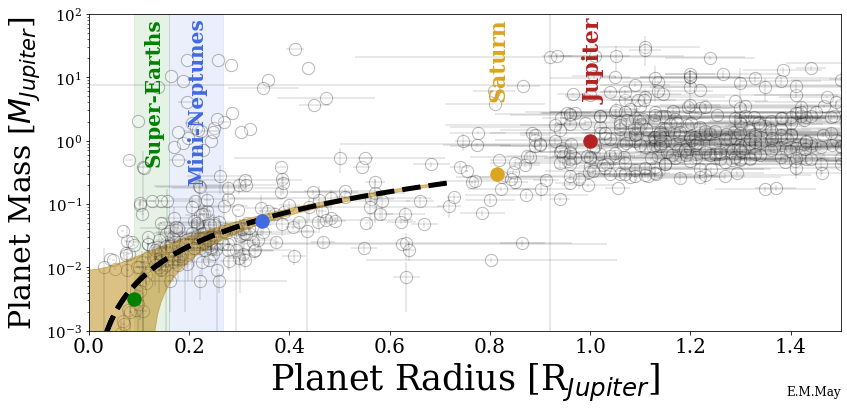

In [7]:
planets_s=pd.read_csv('planets.csv',skiprows=72,delimiter=',')
list(planets_s)


plt.figure(figsize=(12.,11./2.))
plt.gcf().subplots_adjust(bottom=0.18,top=0.98,left=0.12,right=0.99)

radnept=2.46*10**9. 
massnept=1.0241*10**29.

radearth=6.371*10**8.
massearth=5.97*10**27.

raderr1=planets_s['pl_radjerr1']
raderr2=planets_s['pl_radjerr2']
maserr1=planets_s['pl_bmassjerr1']
maserr2=planets_s['pl_bmassjerr2']


plt.fill_between([1.0*radearth/radjup,1.8*radearth/radjup],0,100,color='green',alpha=0.1)
plt.fill_between([1.8*radearth/radjup,3.0*radearth/radjup],0,100,color='royalblue',alpha=0.1)


plt.errorbar(planets_s['pl_radj'],planets_s['pl_bmassj'],
             xerr=raderr1,
             yerr=maserr1,
            fmt='none',alpha=0.12,color='black')
plt.scatter(planets_s['pl_radj'],planets_s['pl_bmassj'],s=150,facecolor='white',edgecolor='black',alpha=0.28)

plt.scatter(radnept/radjup,massnept/massjup,s=180,facecolor='royalblue',edgecolor='royalblue',zorder=10)
plt.scatter(radearth/radjup,massearth/massjup,s=180,facecolor='green',edgecolor='green',zorder=10)
plt.scatter(radsat/radjup,masssat/massjup,s=180,facecolor='goldenrod',edgecolor='goldenrod',zorder=10)
plt.scatter(1.0,1.0,s=180,facecolor='firebrick',edgecolor='firebrick',zorder=10)


plt.xlabel('Planet Radius [R$_{Jupiter}$]',fontsize=35)
plt.xticks(fontsize=20)

plt.ylabel('Planet Mass [$M_{Jupiter}$]',fontsize=30)
plt.yticks(fontsize=15)

plt.yscale('log')
#plt.yscale('log')
#plt.ylim(0.001,150)
plt.xlim(0,1.5)
plt.ylim(0.001,100)

plt.figtext(0.195,0.97,'Super-Earths',color='green',weight='bold',fontsize=20,rotation='vertical',ha='center',va='top')
plt.figtext(0.245,0.97,'Mini-Neptunes',color='royalblue',weight='bold',fontsize=20,rotation='vertical',ha='center',va='top')


plt.figtext(0.594,0.97,'Saturn',color='goldenrod',weight='bold',fontsize=22,rotation='vertical',ha='center',va='top')
plt.figtext(0.705,0.97,'Jupiter',color='firebrick',weight='bold',fontsize=22,rotation='vertical',ha='center',va='top')


#plt.figtext(0.16,0.88,'Transits',color='blue',weight='bold',fontsize=25)
#plt.figtext(0.135,0.925,'Radial Velocity',color=rvc,weight='bold',fontsize=25)

#### R<1.6
R_16=np.linspace(0,1.6,100)*radearth
M_16=wolfgang_mr(R_16,1.4,2.3)*massearth
#ll,ul=wolfgang_mr_f1(R_4,2.6,1.3,0.0)
#plt.plot(R_16/radjup,M_16/massjup,color='black',linewidth=5.0,linestyle='--')

#### R<4
R_4=np.linspace(0.0,4.0,100)*radearth
M_4=wolfgang_mr(R_4,1.6,1.8)*massearth
ll4,ul4=wolfgang_mr_f2(R_4,2.6,1.3,2.1,1.5,0.68)
plt.plot(R_4/radjup,M_4/massjup,color='black',linewidth=5.0,linestyle='--')
#plt.fill_between(R_4/radjup,ll4*(massearth/massjup),ul4*(massearth/massjup),color='darkgoldenrod',alpha=0.5)

#### R<8
R_8=np.linspace(0.0,8.0,100)*radearth
M_8=wolfgang_mr(R_8,1.6,1.8)*massearth
ll8,ul8=wolfgang_mr_f1(R_8,1.6,1.8,2.9,0.68)
plt.plot(R_8/radjup,M_8/massjup,color='black',linewidth=5.0,linestyle='--')
plt.fill_between(R_8/radjup,ll8*(massearth/massjup),ul8*(massearth/massjup),color='darkgoldenrod',alpha=0.5)

plt.figtext(0.99,0.01, 'E.M.May', fontsize = 12, ha = 'right', va = 'bottom')

plt.savefig('DT_MvR_funcs.png')
plt.show()

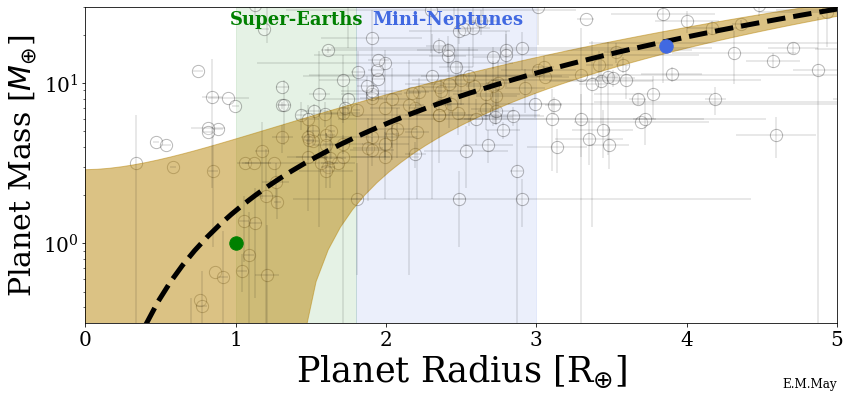

In [8]:
planets_s=pd.read_csv('planets.csv',skiprows=72,delimiter=',')
list(planets_s)


plt.figure(figsize=(12.,11./2.))
plt.gcf().subplots_adjust(bottom=0.18,top=0.98,left=0.12,right=0.99)

radnept=2.46*10**9. 
massnept=1.0241*10**29.

radearth=6.371*10**8.
massearth=5.97*10**27.

raderr1=planets_s['pl_radjerr1']
raderr2=planets_s['pl_radjerr2']
maserr1=planets_s['pl_bmassjerr1']
maserr2=planets_s['pl_bmassjerr2']


plt.fill_between([1.0,1.8],0,30,color='green',alpha=0.1)
plt.fill_between([1.8,3.0],0,30,color='royalblue',alpha=0.1)


plt.errorbar(planets_s['pl_radj']*radjup/radearth,planets_s['pl_bmassj']*massjup/massearth,
             xerr=raderr1*radjup/radearth,
             yerr=maserr1*massjup/massearth,
            fmt='None',alpha=0.12,color='black')
plt.scatter(planets_s['pl_radj']*radjup/radearth,planets_s['pl_bmassj']*massjup/massearth,s=150,facecolor='white',edgecolor='black',alpha=0.28)

plt.scatter(radnept/radearth,massnept/massearth,s=180,facecolor='royalblue',edgecolor='royalblue',zorder=10)
plt.scatter(radearth/radearth,massearth/massearth,s=180,facecolor='green',edgecolor='green',zorder=10)
#plt.scatter(radsat/radjup,masssat/massjup,s=180,facecolor='goldenrod',edgecolor='goldenrod',zorder=10)
#plt.scatter(1.0,1.0,s=180,facecolor='firebrick',edgecolor='firebrick',zorder=10)


plt.xlabel('Planet Radius [R$_{\oplus}$]',fontsize=35)
plt.xticks(fontsize=20)

plt.ylabel('Planet Mass [$M_{\oplus}$]',fontsize=30)
plt.yticks(fontsize=20)

plt.yscale('log')
#plt.yscale('log')
#plt.ylim(0.001,150)
plt.xlim(0,5.0)
plt.ylim(0.001*massjup/massearth,30)

plt.figtext(0.365,0.97,'Super-Earths',color='green',weight='bold',fontsize=18,rotation='horizontal',ha='center',va='top')
plt.figtext(0.54,0.97,'Mini-Neptunes',color='royalblue',weight='bold',fontsize=18,rotation='horizontal',ha='center',va='top')


#plt.figtext(0.594,0.97,'Saturn',color='goldenrod',weight='bold',fontsize=28,rotation='vertical',ha='center',va='top')
#plt.figtext(0.705,0.97,'Jupiter',color='firebrick',weight='bold',fontsize=28,rotation='vertical',ha='center',va='top')


#plt.figtext(0.16,0.88,'Transits',color='blue',weight='bold',fontsize=25)
#plt.figtext(0.135,0.925,'Radial Velocity',color=rvc,weight='bold',fontsize=25)

#### R<1.6
R_16=np.linspace(0,1.6,100)*radearth
M_16=wolfgang_mr(R_16,1.4,2.3)*massearth
#ll,ul=wolfgang_mr_f1(R_4,2.6,1.3,0.0)
#plt.plot(R_16/radjup,M_16/massjup,color='black',linewidth=5.0,linestyle='--')

#### R<4
R_4=np.linspace(0.0,4.0,100)*radearth
M_4=wolfgang_mr(R_4,1.6,1.8)*massearth
ll4,ul4=wolfgang_mr_f2(R_4,2.6,1.3,2.1,1.5,0.68)
#plt.plot(R_4/radearth,M_4/massearth,color='black',linewidth=5.0,linestyle='--')
#plt.fill_between(R_4/radearth,ll4,ul4,color='darkgoldenrod',alpha=0.5)

#### R<8
R_8=np.linspace(0.0,8.0,100)*radearth
M_8=wolfgang_mr(R_8,1.6,1.8)*massearth
ll8,ul8=wolfgang_mr_f1(R_8,1.6,1.8,2.9,0.68)
plt.plot(R_8/radearth,M_8/massearth,color='black',linewidth=5.0,linestyle='--')
plt.fill_between(R_8/radearth,ll8,ul8,color='darkgoldenrod',alpha=0.5)

plt.figtext(0.99,0.01, 'E.M.May', fontsize = 12, ha = 'right', va = 'bottom')

plt.savefig('DT_MvR_funcs_z.png')
plt.show()


## uses comp-curves from:
http://adsabs.harvard.edu/abs/2016ApJ...819..127Z
​


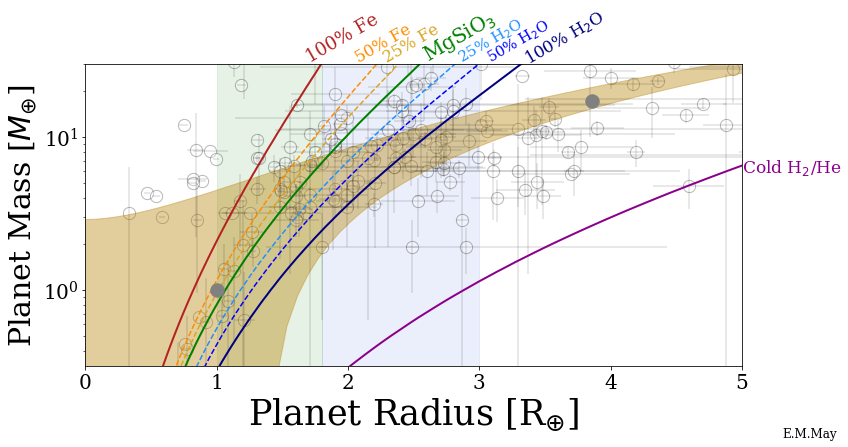

In [9]:
cc=pd.read_csv('comp_curves.csv',skiprows=[1])
#list(cc)

mass_cc=cc['       ']


plt.figure(figsize=(12.,12./2.))
plt.gcf().subplots_adjust(bottom=0.18,top=0.88,left=0.12,right=0.88)

radnept=2.46*10**9. 
massnept=1.0241*10**29.

radearth=6.371*10**8.
massearth=5.97*10**27.

facr=radjup/radearth
facm=massjup/massearth

raderr1=planets_s['pl_radjerr1'].values
raderr2=planets_s['pl_radjerr2'].values
maserr1=planets_s['pl_bmassjerr1'].values
maserr2=planets_s['pl_bmassjerr2'].values

raderr=[raderr1*facr,raderr2*facr]
maserr=[maserr1*facm,maserr2*facm]




plt.fill_between([facr*1.0*radearth/radjup,facr*1.8*radearth/radjup],0,30,color='green',alpha=0.1)
plt.fill_between([facr*1.8*radearth/radjup,facr*3.0*radearth/radjup],0,30,color='royalblue',alpha=0.1)


plt.errorbar(facr*planets_s['pl_radj'],facm*planets_s['pl_bmassj'],
             xerr=raderr1*facr,
             yerr=maserr1*facm,
            fmt='None',alpha=0.12,color='black')

plt.scatter(facr*planets_s['pl_radj'],facm*planets_s['pl_bmassj'],s=150,facecolor='white',edgecolor='black',alpha=0.28)

plt.scatter(facr*radnept/radjup,facm*massnept/massjup,s=180,facecolor='gray',edgecolor='gray',zorder=10)
plt.scatter(facr*radearth/radjup,facm*massearth/massjup,s=180,facecolor='gray',edgecolor='gray',zorder=10)
#plt.scatter(facr*radsat/radjup,facm*masssat/massjup,s=180,facecolor='goldenrod',edgecolor='goldenrod',zorder=10)
#plt.scatter(facr*1.0,facm*1.0,s=180,facecolor='firebrick',edgecolor='firebrick',zorder=10)

plt.plot(cc['100%fe'],mass_cc,'-',linewidth=2.0,color='firebrick')
plt.plot(cc['50%fe '],mass_cc,'--',linewidth=1.5,color='darkorange')
plt.plot(cc['25%fe '],mass_cc,'--',linewidth=1.5,color='goldenrod')
plt.plot(cc['rocky '],mass_cc,'-',linewidth=2.0,color='green')
plt.plot(cc['25%h2o'],mass_cc,'--',linewidth=1.5,color='dodgerblue')
plt.plot(cc['50%h2o'],mass_cc,'--',linewidth=1.5,color='blue')
plt.plot(cc['100%h2o'],mass_cc,'-',linewidth=2.0,color='navy')
plt.plot(cc['cold_h2/he'],mass_cc,'-',linewidth=2.0,color='darkmagenta')

plt.xlabel('Planet Radius [R$_{\oplus}$]',fontsize=35)
plt.xticks(fontsize=20)

plt.ylabel('Planet Mass [$M_{\oplus}$]',fontsize=30)
plt.yticks(fontsize=20)

plt.yscale('log')
#plt.yscale('log')
#plt.ylim(0.001,150)
plt.xlim(0*facr,5.0)
plt.ylim(0.001*facm,30)

#plt.figtext(0.255,0.18,'Super-Earths',color='green',weight='bold',fontsize=13,rotation='horizontal',ha='left',va='top')
#plt.figtext(0.435,0.18,'Mini-Neptunes',color='royalblue',weight='bold',fontsize=13,rotation='horizontal',ha='left',va='top')


#plt.figtext(0.594,0.97,'Saturn',color='goldenrod',weight='bold',fontsize=25,rotation='vertical',ha='center',va='top')
#plt.figtext(0.705,0.97,'Jupiter',color='firebrick',weight='bold',fontsize=25,rotation='vertical',ha='center',va='top')

ra=30
plt.annotate('100% Fe', xy=((cc['100%fe'].values)[-8],29.0),xycoords='data',color='firebrick',fontsize=18,rotation=ra,va='bottom')
plt.annotate('50% Fe', xy=((cc['50%fe '].values)[-8],29.0),xycoords='data',color='darkorange',fontsize=16,rotation=ra,va='bottom')
plt.annotate('25% Fe', xy=((cc['25%fe '].values)[-6],29.0),xycoords='data',color='goldenrod',fontsize=16,rotation=ra,va='bottom')
plt.annotate('MgSiO$_3$', xy=((cc['rocky '].values)[-2],29.0),xycoords='data',color='green',fontsize=20,rotation=ra,va='bottom')
plt.annotate('25% H$_2$O', xy=((cc['25%h2o'].values)[-2],29.0),xycoords='data',color='dodgerblue',fontsize=15,rotation=ra,va='bottom')
plt.annotate('50% H$_2$O', xy=((cc['50%h2o'].values)[-1],29.0),xycoords='data',color='blue',fontsize=14.5,rotation=ra,va='bottom')
plt.annotate('100% H$_2$O', xy=((cc['100%h2o'].values)[-2],28),xycoords='data',color='navy',fontsize=16.5,rotation=ra,va='bottom')

#plt.annotate('Cold H$_2$/He', xy=(6.,5.009),color='darkmagenta',fontsize=18)
plt.figtext(0.88,0.63,'Cold H$_2$/He',color='darkmagenta',fontsize=17)

R_8=np.linspace(0.0,8.0,100)*radearth
M_8=wolfgang_mr(R_8,1.6,1.8)*massearth
ll8,ul8=wolfgang_mr_f1(R_8,1.6,1.8,2.9,0.68)
#plt.plot(R_8/radearth,M_8/massearth,color='black',linewidth=3.0,linestyle='--',alpha=0.5)
plt.fill_between(R_8/radearth,ll8,ul8,color='darkgoldenrod',alpha=0.4)

plt.figtext(0.99,0.01, 'E.M.May', fontsize = 12, ha = 'right', va = 'bottom')

plt.savefig('DT_MvR_cc_wf.png')
plt.show()